country=	Name of the country

child_mort	=Death of children under 5 years of age per 1000 live births

exports=	Exports of goods and services per capita. Given as %age of the GDP per capita

health=	Total health spending per capita. Given as %age of GDP per capita

imports	=Imports of goods and services per capita. Given as %age of the GDP per capita

Income=	Net income per person

Inflation=	The measurement of the annual growth rate of the Total GDP

life_expec=	The average number of years a new born child would live if the current mortality patterns are to remain the same

total_fer	=The number of children that would be born to each woman if the current age-fertility rates remain the same.

gdpp	=The GDP per capita. Calculated as the Total GDP divided by the total population.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the datas

In [2]:
df=pd.read_csv('Country-data.csv')
df.head()
#loading the datas

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#rows,columns in the dataset
df.shape

(167, 10)

### Understanding the datas

In [4]:
df.info()
#gives the datatype of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### only one categorical columns.Rest of the columns are numerical.

In [176]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [177]:
df['country'].unique()
#gives names of all the countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

### Data Cleaning

In [4]:
df.isnull().sum()
# Checking for null values in the column

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### no null values are present.

### Exploratory data analysis

#We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

#### Lets see top 10 countries which are suffering in each factor.

#### 1.child mortality

In [8]:
top10_childmort=df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
top10_childmort

,country,child_mort
66,Haiti,208.0
132,Sierra Leone,160.0
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0
113,Nigeria,130.0
112,Niger,123.0
3,Angola,119.0
25,Burkina Faso,116.0
37,"Congo, Dem. Rep.",116.0


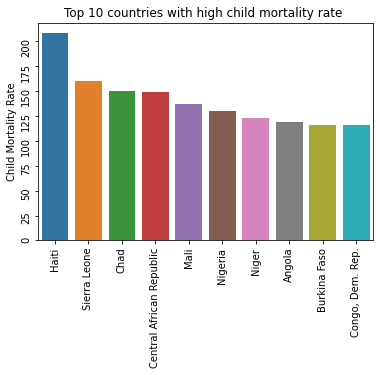

In [9]:
sns.barplot(x='country',y='child_mort',data=top10_childmort)
plt.title('Top 10 countries with high child mortality rate ')
plt.ylabel('Child Mortality Rate')
plt.xlabel('')
plt.tick_params(rotation=90)
plt.show()

#### 'Haiti' ,'Sierra Loene' and 'Chad' are the top 3 countries which  has  high child mortality rate.

#### 2.Total fertility

In [10]:
top10_totalfer = df[['country','total_fer']].sort_values('total_fer', ascending = False) .head(10)
top10_totalfer

,country,total_fer
112,Niger,7.49
32,Chad,6.59
97,Mali,6.55
37,"Congo, Dem. Rep.",6.54
26,Burundi,6.26
149,Timor-Leste,6.23
3,Angola,6.16
155,Uganda,6.15
25,Burkina Faso,5.87
113,Nigeria,5.84


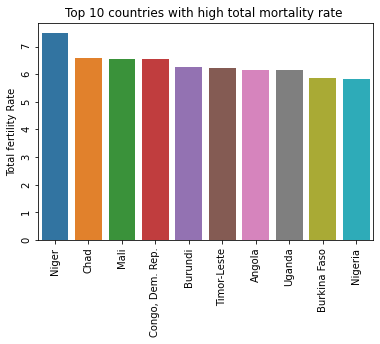

In [11]:
sns.barplot(x='country',y='total_fer',data=top10_totalfer)
plt.title('Top 10 countries with high total mortality rate ')
plt.ylabel('Total fertility Rate')
plt.xlabel('')
plt.tick_params(rotation=90)
plt.show()

#### 'Niger','chad','Mali'  are the top 3 countries which  has high total fertility rate.

#### 3.Life Expectancy

In [17]:
top10_low_lifeexpec=df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
top10_low_lifeexpec

,country,life_expec
66,Haiti,32.1
87,Lesotho,46.5
31,Central African Republic,47.5
166,Zambia,52.0
94,Malawi,53.1
137,South Africa,54.3
106,Mozambique,54.5
132,Sierra Leone,55.0
64,Guinea-Bissau,55.6
0,Afghanistan,56.2


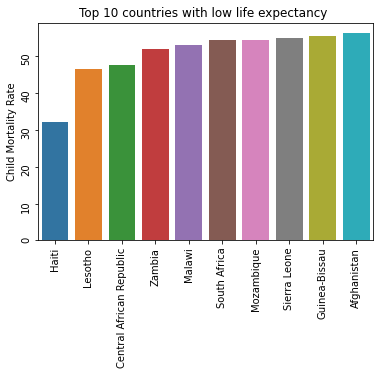

In [18]:
sns.barplot(x='country',y='life_expec',data=top10_low_lifeexpec)
plt.title('Top 10 countries with low life expectancy ')
plt.ylabel('Child Mortality Rate')
plt.xlabel('')
plt.tick_params(rotation=90)
plt.show()

#### 'Haiti' ,'Lesotho' and 'Cenral Africal Republic' are the top 3 countries which  has the worst life expectancy.

#### 4.Health

In [19]:
top10_leastspent_health = df[['country','health']].sort_values('health', ascending = True).head(10)
top10_leastspent_health

,country,health
123,Qatar,1.81
107,Myanmar,1.97
116,Pakistan,2.20
38,"Congo, Rep.",2.46
154,Turkmenistan,2.50
70,Indonesia,2.61
82,Kuwait,2.63
50,Eritrea,2.66
115,Oman,2.77
23,Brunei,2.84


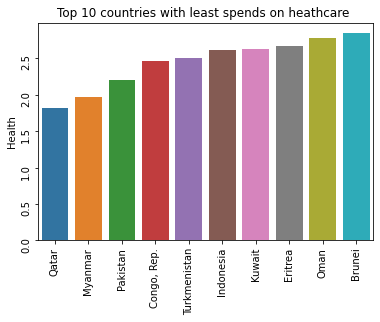

In [20]:
sns.barplot(x='country',y='health',data=top10_leastspent_health)
plt.title('Top 10 countries with least spends on heathcare ')
plt.ylabel('Health')
plt.xlabel('')
plt.tick_params(rotation=90)
plt.show()

#### Qatar,Myanmar,Pakistan are the top 3 countires which spends least on heathcare

#### 5.Imports

In [26]:
top10_low_imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)
top10_low_imports

,country,imports
107,Myanmar,0.0659
22,Brazil,11.8000
77,Japan,13.6000
159,United States,15.8000
5,Argentina,16.0000
142,Sudan,17.2000
113,Nigeria,17.4000
163,Venezuela,17.6000
35,Colombia,17.8000
55,Gabon,18.9000


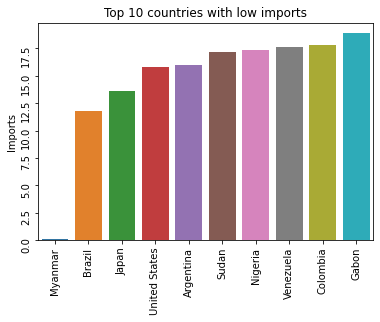

In [21]:
sns.barplot(x='country',y='imports',data=top10_low_imports)
plt.title('Top 10 countries with low imports')
plt.ylabel('Imports')
plt.xlabel('')
plt.tick_params(rotation=90)
plt.show()

#### Myanmar,Brazil and Japan are the countries which have low imports

#### 6.Exports

In [27]:
top10_low_exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)
top10_low_exports

,country,exports
107,Myanmar,0.109
149,Timor-Leste,2.200
50,Eritrea,4.790
26,Burundi,8.920
109,Nepal,9.580
0,Afghanistan,10.000
22,Brazil,10.700
31,Central African Republic,11.800
126,Rwanda,12.000
151,Tonga,12.400


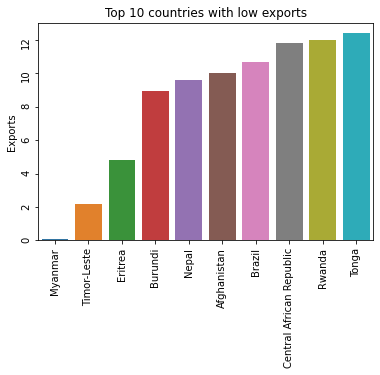

In [37]:
sns.barplot(x='country',y='exports',data=top10_low_exports)
plt.title('Top 10 countries with low exports')
plt.ylabel('Exports')
plt.xlabel('')
plt.tick_params(rotation=90)
plt.show()

#### Myanmar,Timor-Leste,Eritrea are top 3 low export countries.

#### 7.Per capita Income

In [28]:
Top10_low_income = df[['country','income']].sort_values('income', ascending = True).head(10)
Top10_low_income

,country,income
37,"Congo, Dem. Rep.",609
88,Liberia,700
26,Burundi,764
112,Niger,814
31,Central African Republic,888
106,Mozambique,918
94,Malawi,1030
63,Guinea,1190
150,Togo,1210
132,Sierra Leone,1220


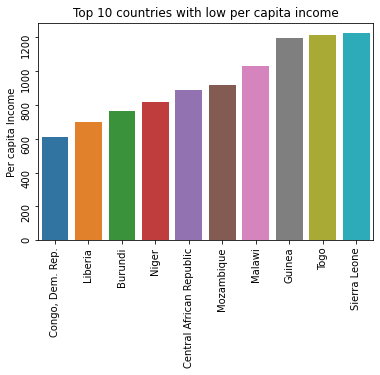

In [11]:
sns.barplot(x='country',y='income',data=Top10_low_income)
plt.title('Top 10 countries with low per capita income')
plt.ylabel('Per capita Income')
plt.xlabel('')
plt.tick_params(rotation=90)
plt.show()

#### Congo, Dem. Rep,Liberia,Burundi are the countires with low per capita income.

#### 8.GDP per capita

In [29]:
Top10_low_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
Top10_low_gdpp

,country,gdpp
26,Burundi,231
88,Liberia,327
37,"Congo, Dem. Rep.",334
112,Niger,348
132,Sierra Leone,399
93,Madagascar,413
106,Mozambique,419
31,Central African Republic,446
94,Malawi,459
50,Eritrea,482


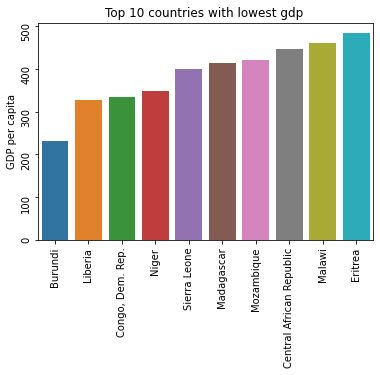

In [8]:
sns.barplot(x='country',y='gdpp',data=Top10_low_gdpp)
plt.title('Top 10 countries with lowest gdp ')
plt.ylabel('GDP per capita')
plt.xlabel('')
plt.tick_params(rotation=90)
plt.show()

#### Burundi,Liberia,Congo, Dem. Rep are the top 3countires with low GDP per capita.

#### 8.Inflation

In [30]:
top10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
top10_inflation

,country,inflation
113,Nigeria,104.0
163,Venezuela,45.9
103,Mongolia,39.2
149,Timor-Leste,26.5
49,Equatorial Guinea,24.9
165,Yemen,23.6
140,Sri Lanka,22.8
3,Angola,22.4
5,Argentina,20.9
37,"Congo, Dem. Rep.",20.8


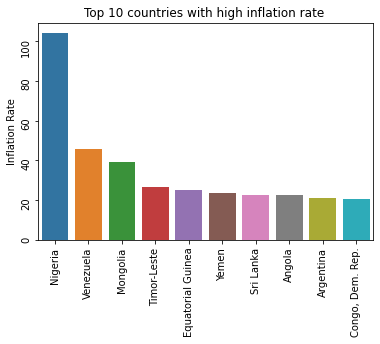

In [9]:
sns.barplot(x='country',y='inflation',data=top10_inflation)
plt.title('Top 10 countries with high inflation rate ')
plt.ylabel('Inflation Rate')
plt.xlabel('')
plt.tick_params(rotation=90)
plt.show()

#### Nigeria,Venezuela,Mongolia are the top 3countries with high inflation rate.

In [ ]:
#Lets see the correaltion between the features.

<Figure size 288x288 with 0 Axes>

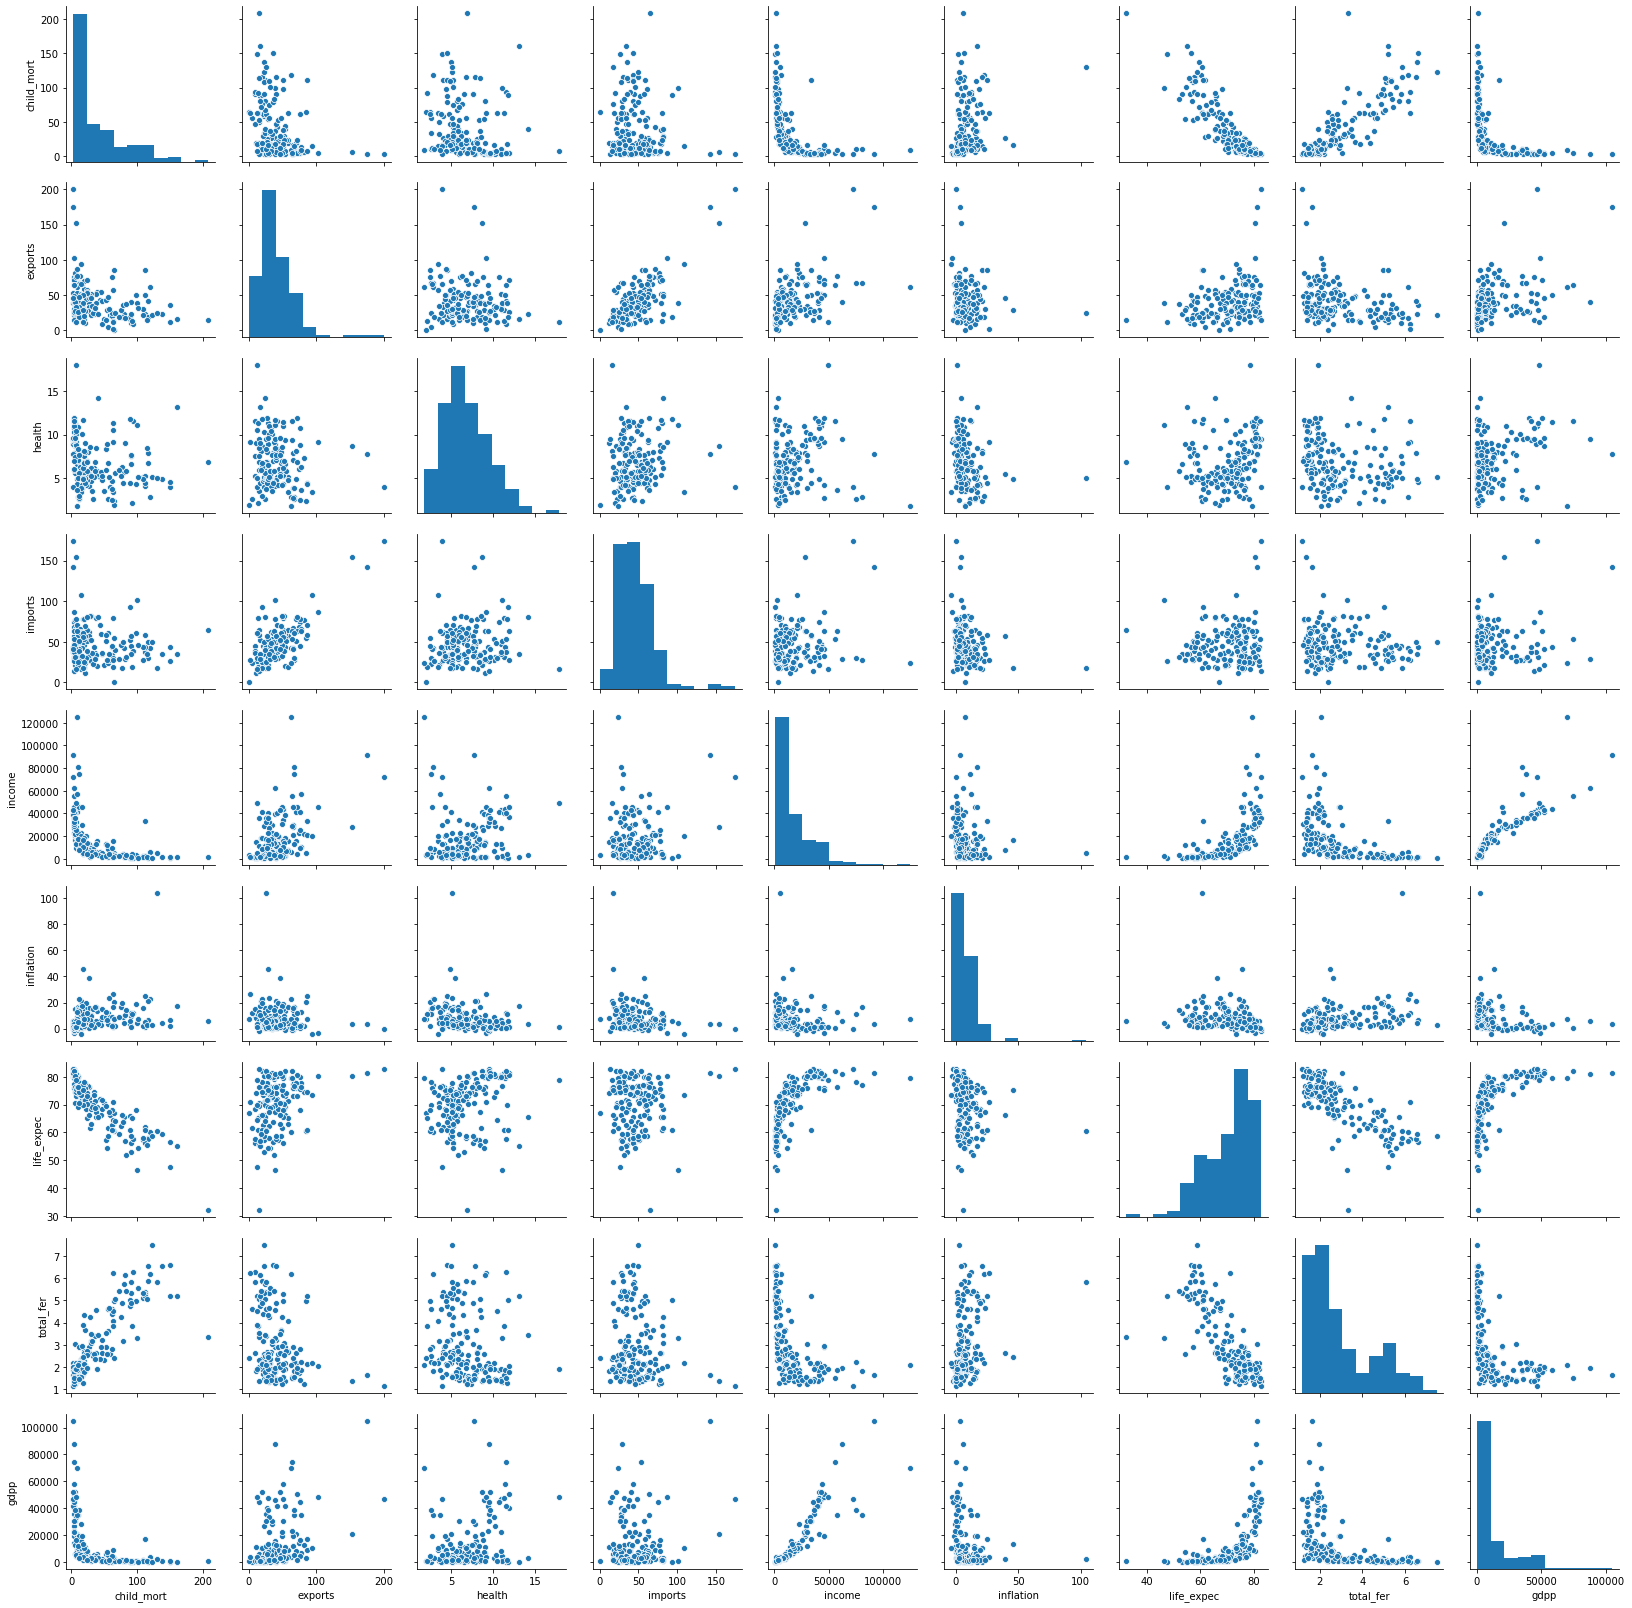

In [12]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(df)
plt.show()

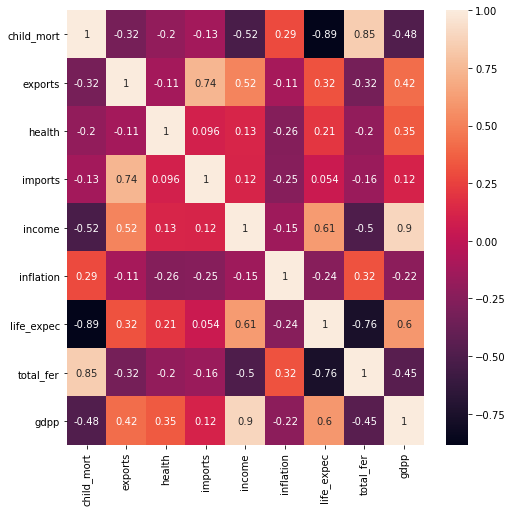

In [5]:
# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (8,8))  
sns.heatmap(df.corr(),annot = True)
plt.show()

In [ ]:
#from the above pairplot,we can see that some features have high correlation with each other.
#For example total_fertility and child mortality ,Income and gdpp are highly correlated with each other.

#### Lets treat this multicollinearity of features by PCA method.

### Outlier analysis

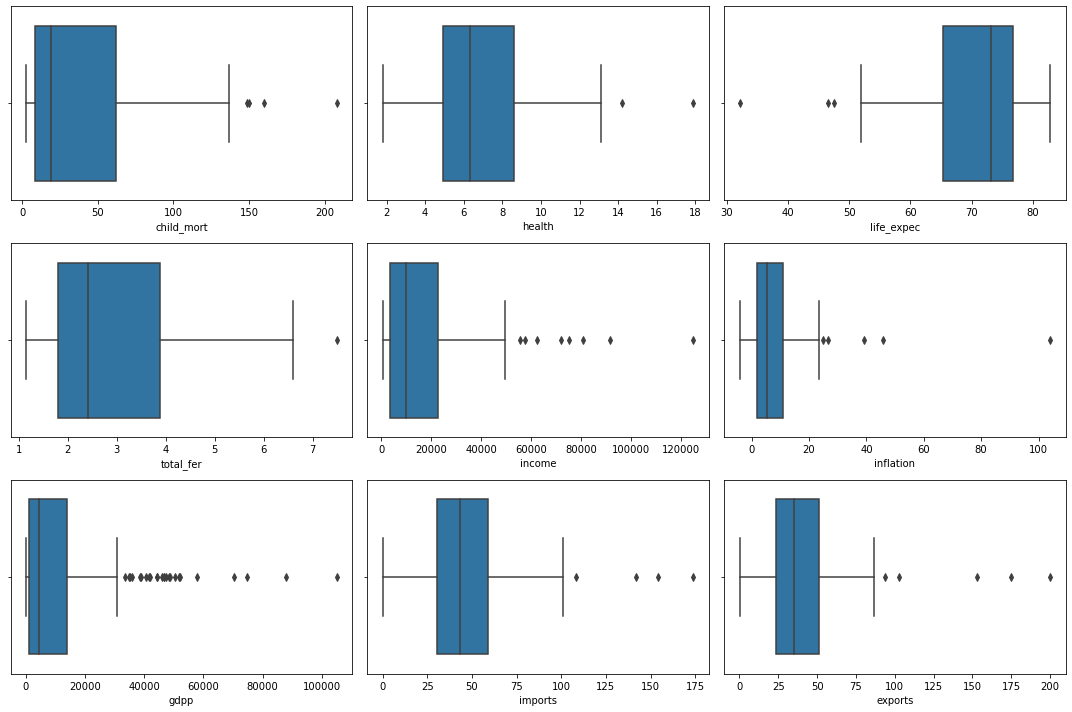

In [6]:
fig, axs = plt.subplots(3,3, figsize = (15,10))
sns.boxplot(df['child_mort'], ax = axs[0,0])
sns.boxplot(df['health'], ax = axs[0,1])
sns.boxplot(df['life_expec'], ax = axs[0,2])
sns.boxplot(df['total_fer'], ax = axs[1,0])
sns.boxplot(df['income'], ax = axs[1,1])
sns.boxplot(df['inflation'], ax = axs[1,2])
sns.boxplot(df['gdpp'], ax = axs[2,0])
sns.boxplot(df['imports'], ax = axs[2,1])
sns.boxplot(df['exports'], ax = axs[2,2])


plt.tight_layout()

#### we can see that columns gdp,income have more outliers compared with all other features.
Outliers in the columns like exports,imports,inflation cannot be removed,because if we do,there might be loss in countries details which  are not doing well-socio-economically(countries with direst need of aid).

In [ ]:
#Lets us remove the outliers from gdpp column,considering outliers as above 95% quantile range,so that there will not be any loss in countries details.

In [7]:
df.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [8]:
Q1 = df['gdpp'].quantile(0.05)
Q3 = df['gdpp'].quantile(0.95)
#IQR = Q3-Q1
df_out = df[(df['gdpp'] <= Q3)]

In [9]:
df_out.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,39.447462,6.688671,46.378265,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,25.243334,2.683807,23.229783,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,10.300000,23.575000,4.872500,30.475000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,34.000000,6.105000,43.250000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,50.675000,8.250000,58.475000,20100.000000,11.175000,76.400000,4.200000,12075.000000
90%,103.100000,68.030000,10.560000,72.110000,36200.000000,16.850000,80.030000,5.346000,31670.000000
95%,116.450000,77.615000,11.345000,80.320000,41415.000000,21.125000,80.960000,5.912000,41815.000000
99%,154.300000,119.256000,13.573000,127.780000,73433.000000,42.081000,82.301000,6.567200,47115.000000


In [224]:
#we can see that most of the outliers are reduced just by handling the gdpp column.

In [10]:
df_out.shape
#shape of the dataset after removing the ouliers

(158, 10)

In [20]:
#Applying pca ,since we have correlated features

### Scaling the datas

In [11]:
#Separating the country column from the datset

x=df_out.drop(['country'],axis=1)
y=df_out['country']

In [12]:
#before applying pca,we need to standardize the datas.

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

df_scaled=ss.fit_transform(x)
df_scaled=pd.DataFrame(df_scaled,columns=x.columns)

In [13]:
df_scaled.head()
#scaled dataset

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.234847,-1.170253,0.333170,-0.063839,-0.856955,0.124994,-1.572901,1.838989,-0.738376
1,-0.582710,-0.454926,-0.051834,0.095946,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
2,-0.318473,-0.041627,-0.941453,-0.646837,-0.113006,0.745941,0.746497,-0.078274,-0.430180
3,1.946065,0.908169,-1.434856,-0.150209,-0.574267,1.333323,-1.127302,2.061470,-0.503541
4,-0.738289,0.240530,-0.246204,0.540752,0.295540,-0.620888,0.780774,-0.575585,0.180376


In [14]:
#applying pca

from sklearn.decomposition import PCA
pca=PCA(random_state=42)

pca.fit(df_scaled)
#fitting the scaled datas to the pca algorithm.

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
#Let's check the variance ratios
pca.explained_variance_ratio_
#this gives the percentage of eigen values

array([0.45480475, 0.1766364 , 0.13336189, 0.10604223, 0.07260472,
       0.02594781, 0.01392215, 0.01011373, 0.00656633])

In [16]:
np.cumsum(pca.explained_variance_ratio_)
##this gives the cummulative percentage of eigen values.

array([0.45480475, 0.63144115, 0.76480304, 0.87084527, 0.94344999,
       0.9693978 , 0.98331995, 0.99343367, 1.        ])

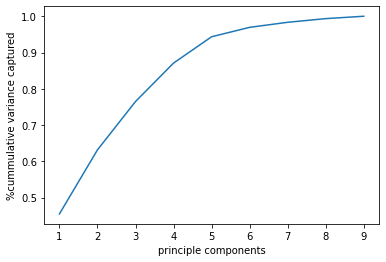

In [17]:
plt.plot(range(1,10),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principle components')
plt.ylabel('%cummulative variance captured')
plt.show()

In [105]:
#from the baove graph,we can say that to capture 95% of variance in the data,we need to use n_components=5.

In [19]:
#fitting the pca model with n_components=5

pca=PCA(n_components=5,whiten=True,random_state=42)
data_pca=pca.fit_transform(df_scaled)
data_pca.shape

(158, 5)

In [17]:
#Lets check for correlation after pca
corrmat=np.corrcoef(data_pca.transpose())

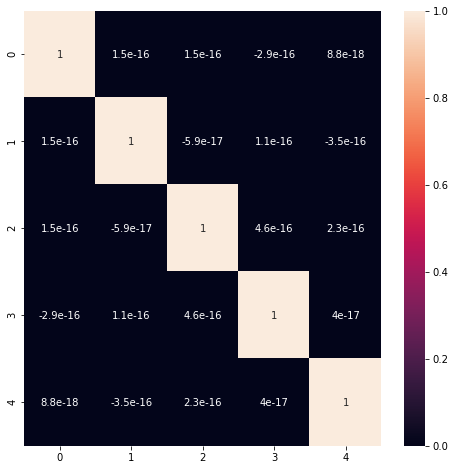

In [18]:
plt.figure(figsize = (8,8))  
sns.heatmap(corrmat,annot = True)
plt.show()

In [19]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 4.612796801342702e-16 , min corr:  -3.4692943318022105e-16


In [ ]:
#now,we can see that correlation are indeed close to zero.

In [20]:
#creating a dataframe with pca dimensions.

data_pca=pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.428573,-0.161940,-0.723648,0.825901,-0.202060
1,0.281646,-0.288116,-0.262108,-1.252737,0.378908
2,-0.040572,-0.268984,1.181897,-0.839820,0.220993
3,-1.394516,1.143161,1.420667,1.128439,-0.552015
4,0.638196,0.258435,-0.145552,-0.679446,-0.210066


In [21]:
data_pca.shape

(158, 5)

#### K-MEANS CLUSTERING

In [24]:
#applying k-means clustering

from sklearn.cluster import KMeans

#### Finding optimum value of k

#### Elbow-Curve Analysis

In [25]:
#to find optimal k-value

ssd=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,random_state=1)
    kmeans.fit(data_pca)
    ssd.append(kmeans.inertia_)

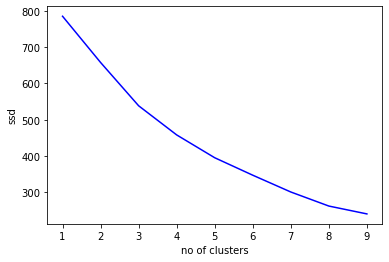

In [26]:
#elbow-curve to find optimal value of k.

plt.plot(range(1,10),ssd,'b')
plt.xlabel('no of clusters')
plt.ylabel('ssd')
plt.show()

In [269]:
#the elbow formation is happend in cluster=3
#from the above graph,we can see that optimal number of clusters is found out to be 3

#### Silhouette Analysis

In [25]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k).fit(data_pca)
    sse_.append([k, silhouette_score(data_pca, kmeans.labels_)])

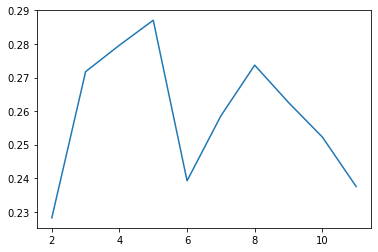

In [26]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

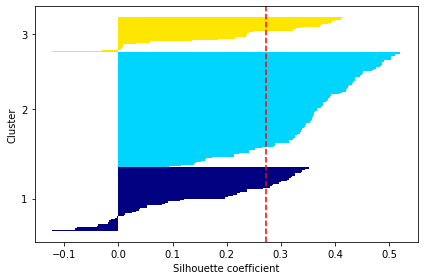

In [27]:
import plusmodules as pm
pm.svisualizer(data_pca,3)

In [ ]:
#By looking silhouette analysis, we see the highest peak is at k =5
#But by looking at the diagram ,we can say that two of the clusters are not very optimum in size .
#so,lets go with next highest peak value 3.

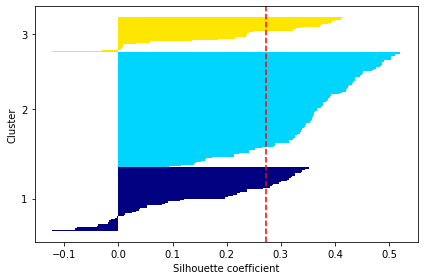

In [28]:
pm.svisualizer(data_pca,3)

In [29]:
#applying cluster=3
kmeans=KMeans(n_clusters=3,random_state=1)
clusters=kmeans.fit_predict(data_pca)

In [30]:
kmeans.labels_
#this gives the labels of the class formed.

array([0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1,
       2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1,
       2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 1,
       2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 0, 0])

In [31]:
df_k=data_pca.copy(deep=True)
df_k['labels']=clusters

In [32]:
df_k.head()

,PC1,PC2,PC3,PC4,PC5,labels
0,-1.428573,-0.161940,-0.723648,0.825901,-0.202060,0
1,0.281646,-0.288116,-0.262108,-1.252737,0.378908,1
2,-0.040572,-0.268984,1.181897,-0.839820,0.220993,1
3,-1.394516,1.143161,1.420667,1.128439,-0.552015,0
4,0.638196,0.258435,-0.145552,-0.679446,-0.210066,1


In [33]:
df_k['labels'].value_counts()

1    84
0    48
2    26
Name: labels, dtype: int64

#### visualization plot for the clustered formed

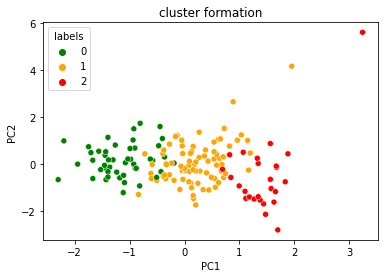

In [34]:
# scatter plot for PC1, PC2 and labels
plt.title('cluster formation')
sns.scatterplot(x='PC1',y='PC2',hue='labels',data=df_k,legend='full', palette=['green','orange','red'])
plt.show()

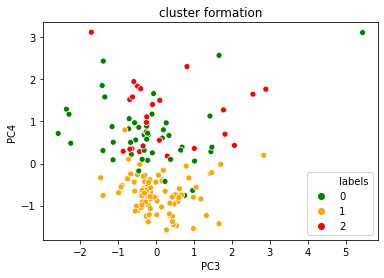

In [289]:
# scatter plot for PC3, PC4 and labels
plt.title('cluster formation')
sns.scatterplot(x='PC3',y='PC4',hue='labels',data=df_k,legend='full', palette=['green','orange','red'])
plt.show()

In [35]:
#merging pca data and actual data
country_kmerge=pd.merge(df_out.reset_index(),df_k,left_index=True,right_index=True)
country_kmerge.head(5)

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,labels
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-1.428573,-0.161940,-0.723648,0.825901,-0.202060,0
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.281646,-0.288116,-0.262108,-1.252737,0.378908,1
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.040572,-0.268984,1.181897,-0.839820,0.220993,1
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-1.394516,1.143161,1.420667,1.128439,-0.552015,0
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.638196,0.258435,-0.145552,-0.679446,-0.210066,1


In [36]:
country_kmerge.shape

(158, 17)

#### Visualising features vs labels 

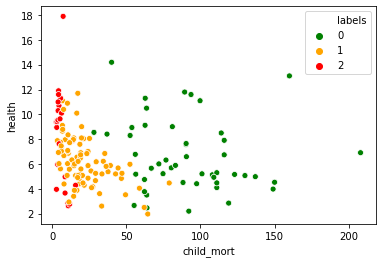

In [292]:
# scatterplot for child_mort, health and labels
sns.scatterplot(x='child_mort',y='health',hue='labels',data=country_kmerge,legend='full', palette=['green','orange','red'])
plt.show()

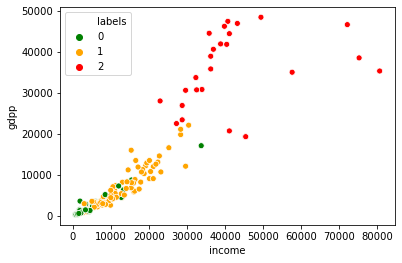

In [296]:
# scatterplot for income, gdpp and labels
sns.scatterplot(x='income',y='gdpp',hue='labels',data=country_kmerge,legend='full', palette=['green','orange','red'])
plt.show()

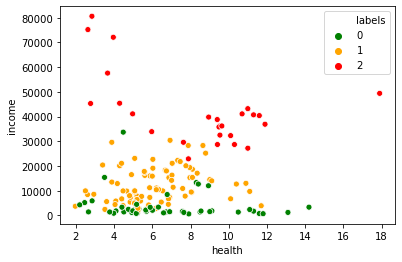

In [295]:
# scatterplot for income, health and labels
sns.scatterplot(x='health',y='income',hue='labels',data=country_kmerge,legend='full', palette=['green','orange','red'])
plt.show()

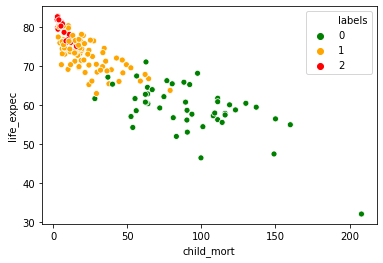

In [293]:
# scatterplot for child_mort, life_expec and labels
sns.scatterplot(x='child_mort',y='life_expec',hue='labels',data=country_kmerge,legend='full', palette=['green','orange','red'])
plt.show()

In [37]:
country_kfinal=country_kmerge.drop(['PC1','PC2','PC3','PC4','PC5','index'],axis=1)
country_kfinal.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [ ]:
#So we have used the PCA techinque and clustered each datapoints and now allocated the clusterIDs back to each of the original datapoints

#### Analysing the clusters

In [38]:
child_mort_mean = pd.DataFrame(country_kfinal.groupby(["labels"]).child_mort.mean())
exports_mean= pd.DataFrame(country_kfinal.groupby(["labels"]).exports.mean())
health_mean = pd.DataFrame(country_kfinal.groupby(["labels"]).health.mean())
imports_mean = pd.DataFrame(country_kfinal.groupby(["labels"]).imports.mean())
income_mean = pd.DataFrame(country_kfinal.groupby(["labels"]).income.mean())
inflat_mean = pd.DataFrame(country_kfinal.groupby(["labels"]).inflation.mean())
life_expec_mean = pd.DataFrame(country_kfinal.groupby(["labels"]).life_expec.mean())
total_fer_mean = pd.DataFrame(country_kfinal.groupby(["labels"]).total_fer.mean())
gdpp_mean =pd.DataFrame(country_kfinal.groupby(["labels"]).gdpp.mean())

In [39]:
country_k_analysis=pd.concat([pd.Series([0,1,2]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean ,life_expec_mean,total_fer_mean,gdpp_mean],axis=1
                )

country_k_analysis.columns = ["k-clusters","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
country_k_analysis

,k-clusters,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,90.800000,29.323125,6.636250,43.793750,3884.020833,11.798646,59.272917,4.998542,1945.041667
1,1,21.819048,42.112964,6.189286,48.784118,12275.357143,7.270286,73.113095,2.227262,6605.380952
2,2,6.146154,49.526923,8.398846,43.376923,41984.615385,3.948500,79.542308,1.865385,35311.538462


In [ ]:
#The above table shows clusterwise mean values of each features.

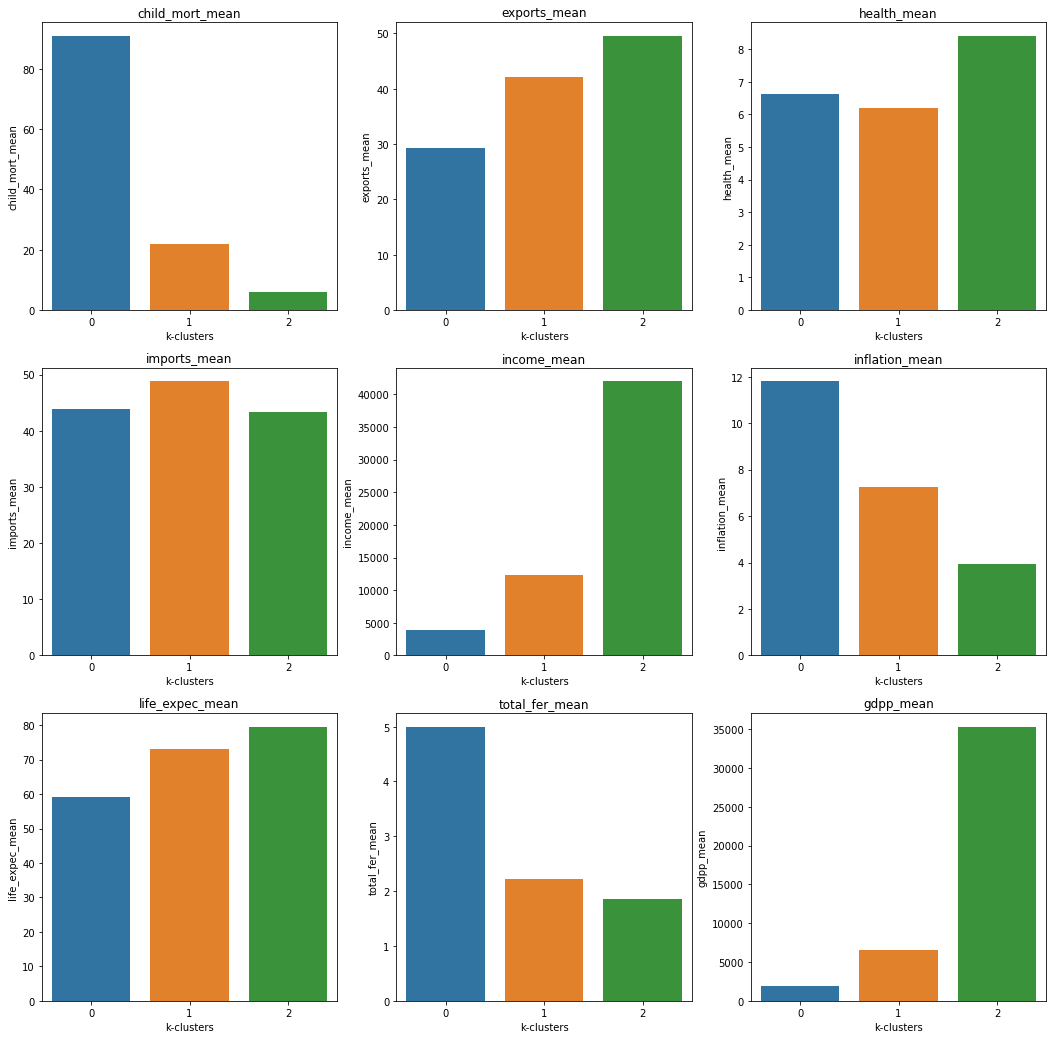

In [47]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_k_analysis['k-clusters'], country_k_analysis.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(country_k_analysis['k-clusters'], country_k_analysis.exports_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(country_k_analysis['k-clusters'], country_k_analysis.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(country_k_analysis['k-clusters'], country_k_analysis.imports_mean)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(country_k_analysis['k-clusters'], country_k_analysis.income_mean)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(country_k_analysis['k-clusters'], country_k_analysis.inflation_mean)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(country_k_analysis['k-clusters'], country_k_analysis.life_expec_mean)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(country_k_analysis['k-clusters'], country_k_analysis.total_fer_mean)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(country_k_analysis['k-clusters'], country_k_analysis.gdpp_mean)

plt.show()

In [ ]:
Looking at the graph we are certain that cluster "0" is our cluster of concern.Because,
1. It has highest child mortality
2. Lowest income
3. Highest Inflation
4. Compartively low life expectancy 
5. Highest total fertility 
6. Lowest gdpp.

In [51]:
#Let us bin our cluster 0
cluster_km=country_kfinal[country_kfinal['labels']==0]
cluster_km.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                     ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
125,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0
89,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0
102,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
90,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
48,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,0


In [ ]:
As per K- means clustering, the country which are direst need of aid are:

1. Burundi
2. Liberia
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10.Eritrea

#### HIERARCHICAL CLUSTERING

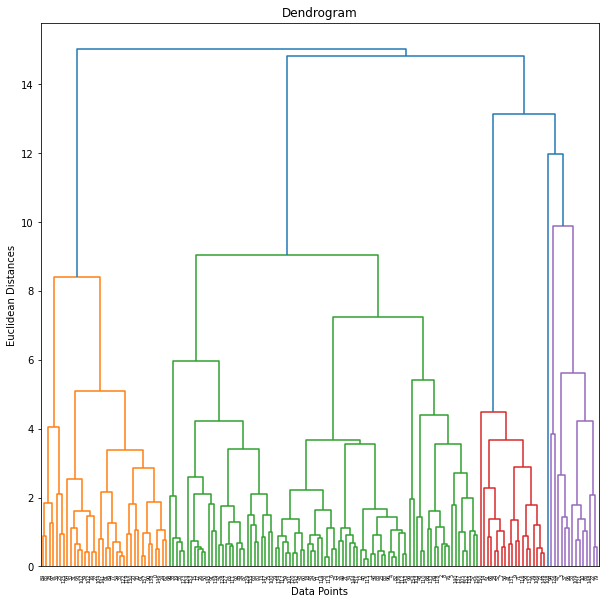

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(data_pca, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
#### From the dendrogram we can read there are 3 clusters in our data set.

In [29]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(data_pca)

df_h = data_pca.copy(deep=True)
df_h['label'] = cluster2

In [30]:
df_h.head()

,PC1,PC2,PC3,PC4,PC5,label
0,-1.428573,-0.161940,-0.723648,0.825901,-0.202060,1
1,0.281646,-0.288116,-0.262108,-1.252737,0.378908,2
2,-0.040572,-0.268984,1.181897,-0.839820,0.220993,2
3,-1.394516,1.143161,1.420667,1.128439,-0.552015,0
4,0.638196,0.258435,-0.145552,-0.679446,-0.210066,2


In [32]:
df_h['label'].value_counts()

2    88
1    36
0    34
Name: label, dtype: int64

In [33]:
#merging pca data and actual data
country_hmerge=pd.merge(df_out.reset_index(),df_h,left_index=True,right_index=True)
country_hmerge.head(5)

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,label
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-1.428573,-0.161940,-0.723648,0.825901,-0.202060,1
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.281646,-0.288116,-0.262108,-1.252737,0.378908,2
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.040572,-0.268984,1.181897,-0.839820,0.220993,2
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-1.394516,1.143161,1.420667,1.128439,-0.552015,0
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.638196,0.258435,-0.145552,-0.679446,-0.210066,2


In [34]:
country_hmerge.shape

(158, 17)

#### Visualising features vs labels

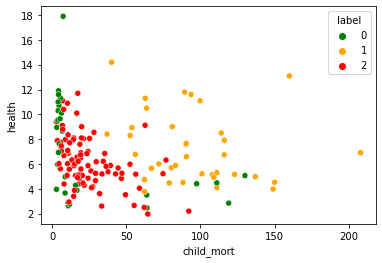

In [36]:
# scatterplot for child_mort, health and labels
sns.scatterplot(x='child_mort',y='health',hue='label',data=country_hmerge,legend='full', palette=['green','orange','red'])
plt.show()

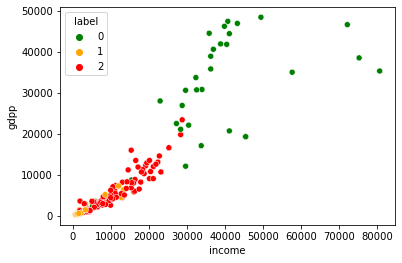

In [37]:
# scatterplot for income, gdpp and labels
sns.scatterplot(x='income',y='gdpp',hue='label',data=country_hmerge,legend='full', palette=['green','orange','red'])
plt.show()

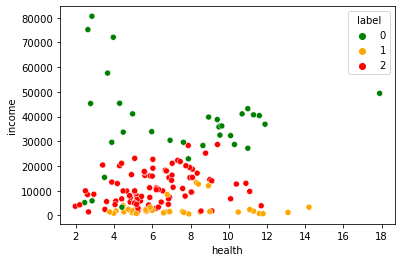

In [39]:
# scatterplot for income, health and labels
sns.scatterplot(x='health',y='income',hue='label',data=country_hmerge,legend='full', palette=['green','orange','red'])
plt.show()

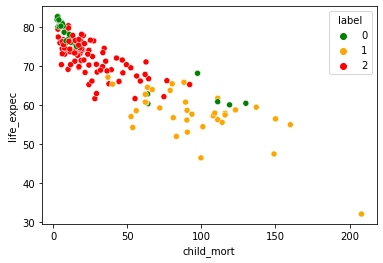

In [41]:
# scatterplot for child_mort, life_expec and labels
sns.scatterplot(x='child_mort',y='life_expec',hue='label',data=country_hmerge,legend='full', palette=['green','orange','red'])
plt.show()

In [42]:
country_hfinal=country_hmerge.drop(['PC1','PC2','PC3','PC4','PC5','index'],axis=1)
country_hfinal.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


#### Analysing the clusters

In [44]:
child_mort_mean_HC = pd.DataFrame(country_hfinal.groupby(["label"]).child_mort.mean())
exports_mean_HC= pd.DataFrame(country_hfinal.groupby(["label"]).exports.mean())
health_mean_HC = pd.DataFrame(country_hfinal.groupby(["label"]).health.mean())
imports_mean_HC = pd.DataFrame(country_hfinal.groupby(["label"]).imports.mean())
income_mean_HC = pd.DataFrame(country_hfinal.groupby(["label"]).income.mean())
inflat_mean_HC = pd.DataFrame(country_hfinal.groupby(["label"]).inflation.mean())
life_expec_mean_HC = pd.DataFrame(country_hfinal.groupby(["label"]).life_expec.mean())
total_fer_mean_HC = pd.DataFrame(country_hfinal.groupby(["label"]).total_fer.mean())
gdpp_mean_HC =pd.DataFrame(country_hfinal.groupby(["label"]).gdpp.mean())

In [49]:
country_h_analysis=pd.concat([pd.Series([0,1,2]),child_mort_mean_HC,exports_mean_HC,health_mean_HC,imports_mean_HC,income_mean_HC,inflat_mean_HC ,life_expec_mean_HC,total_fer_mean_HC,gdpp_mean_HC],axis=1
                )

country_h_analysis.columns = ["label","child_mort_mean_HC","exports_mean_HC","health_mean_HC","imports_mean_HC","income_mean_HC","inflation_mean_HC","life_expec_mean_HC","total_fer_mean_HC","gdpp_mean_HC"]
country_h_analysis

,label,child_mort_mean_HC,exports_mean_HC,health_mean_HC,imports_mean_HC,income_mean_HC,inflation_mean_HC,life_expec_mean_HC,total_fer_mean_HC,gdpp_mean_HC
0,0,22.620588,54.655882,7.387941,45.917647,35878.235294,9.774647,76.414706,2.445588,28989.705882
1,1,94.627778,25.750556,7.249722,45.783333,2819.805556,7.011806,57.780556,4.975278,1342.777778
2,2,24.719318,39.174761,6.188977,46.799612,11224.886364,7.897011,72.460227,2.423409,6049.136364


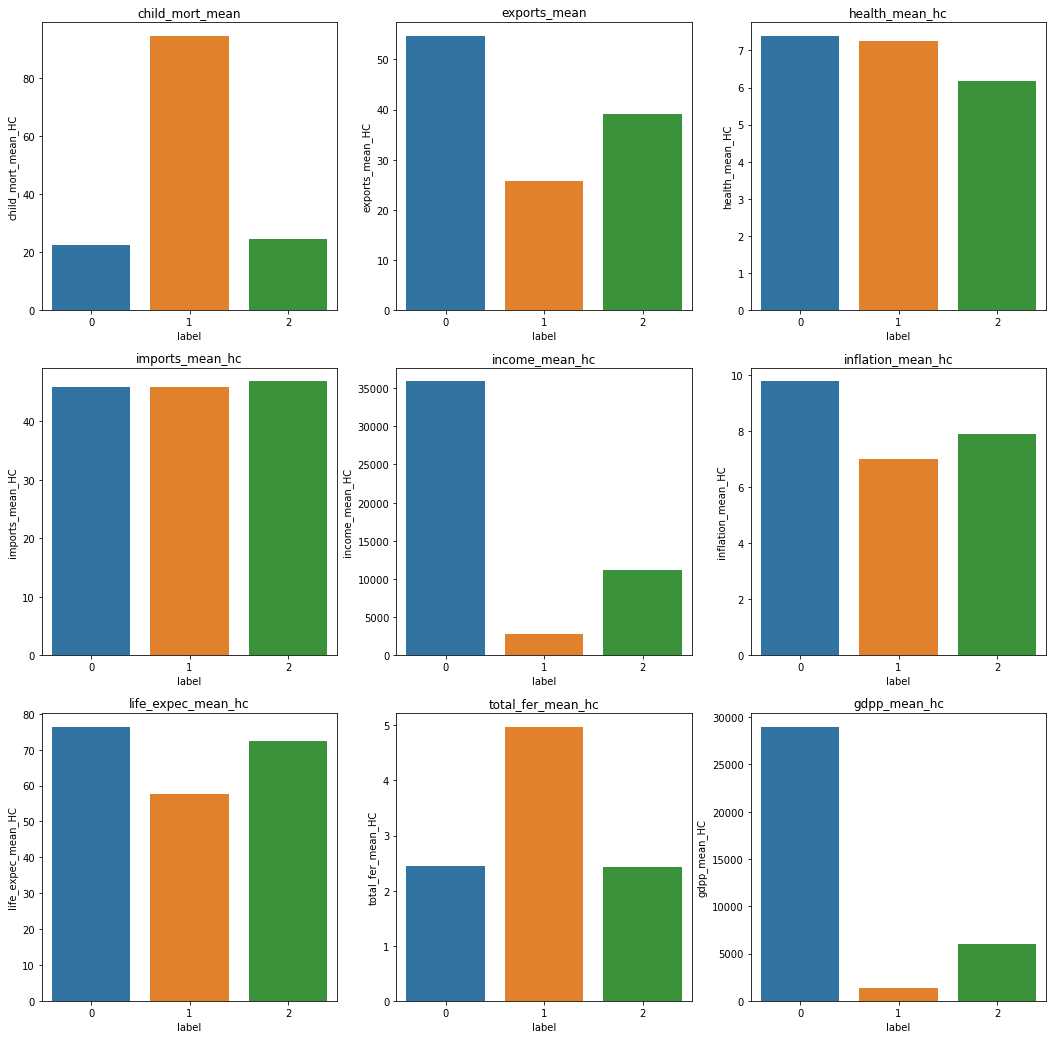

In [53]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_h_analysis.label, country_h_analysis.child_mort_mean_HC)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(country_h_analysis.label ,country_h_analysis.exports_mean_HC)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean_hc")
sns.barplot(country_h_analysis.label, country_h_analysis.health_mean_HC)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean_hc")
sns.barplot(country_h_analysis.label, country_h_analysis.imports_mean_HC)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean_hc")
sns.barplot(country_h_analysis.label, country_h_analysis.income_mean_HC)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean_hc")
sns.barplot(country_h_analysis.label, country_h_analysis.inflation_mean_HC)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean_hc")
sns.barplot(country_h_analysis.label, country_h_analysis.life_expec_mean_HC)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean_hc")
sns.barplot(country_h_analysis.label, country_h_analysis.total_fer_mean_HC)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean_hc")
sns.barplot(country_h_analysis.label, country_h_analysis.gdpp_mean_HC)

plt.show()

In [ ]:
Looking at the graph we are certain that cluster "1" is our cluster of concern.Because,
1. It has highest child mortality
2. Lowest income
3. Highest Inflation
4. Compartively low life expectancy 
5. Highest total fertility 
6. Lowest gdpp.

In [58]:
#Let us bin our cluster 1
cluster_HC=country_hfinal[country_hfinal['label']==1]
cluster_HC.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
125,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
89,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,1
102,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
90,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1
141,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,1


In [ ]:
As per Heirarchical Clustering, the countries which require aid are:

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10.Togo

In [ ]:
We got same countries by both K-means and Heirarchical Clustering: Therefore following are the countries which are in direst need of aid by considering socio – economic factor into consideration:

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi